МЕТОД SORT_VALUES()

Для сортировки значений в DataFrame по значениям одного или нескольких столбцов используется метод sort_values().

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

Основные параметры метода sort_values()

by — имя или список имён столбцов, по значениям которых производится сортировка.
axis — ось, по которой производится сортировка (0 — строки, 1 — столбцы). По умолчанию сортировка производится по строкам.
ascending — сортировка по возрастанию (от меньшего к большему). По умолчанию параметр выставлен на True, для сортировки по убыванию (от большего к меньшему) необходимо выставить его на False.
ignore_index — создаются ли новые индексы в таблице. По умолчанию выставлен на False и сохраняет индексы изначальной таблицы.
inplace — производится ли замена исходной таблицы на отсортированную. По умолчанию параметр выставлен на False, то есть замены не производится. Чтобы переопределить исходную таблицу на отсортированную, необходимо выставить этот параметр на True.

Так, например, отсортируем таблицу сначала по возрастанию расстояния от центра города (Distance), а затем — по возрастанию цены объекта (Price). Для того чтобы вывод был более наглядным, выделим каждую десятую строку из столбцов Distance и Price результирующей таблицы:

In [1]:
melb_df.sort_values(by=['Distance', 'Price']).loc[::10, ['Distance', 'Price']]

NameError: name 'melb_df' is not defined

Найдём информацию о таунхаусах (Type), проданных компанией (SellerG) McGrath, у которых коэффициент соотношения площадей здания и участка (AreaRatio) меньше -0.8. Результат отсортируем по дате продажи (Date) в порядке возрастания, а после проведём сортировку по убыванию коэффициента соотношения площадей. Также обновим старые индексы на новые, установив параметр ignore_index на True. Для наглядности результата выберем из таблицы только столбцы Data и AreaRatio:

In [ ]:
mask1 = melb_df['AreaRatio'] < -0.8
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['SellerG'] == 'McGrath'
melb_df[mask1 & mask2 & mask3].sort_values(
    by=['Date', 'AreaRatio'],
    ascending=[True, False],
    ignore_index=True
).loc[:, ['Date', 'AreaRatio']]

МЕТОД GROUPBY()

В библиотеке Pandas для группировки данных по одному или нескольким признакам можно использовать метод groupby().

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

Основные параметры метода groupby()

by — имя или список имён столбцов, по которым производится группировка.
axis — ось, по которой производится группировка (0 — строки, 1 — столбцы). По умолчанию группировка производится по строкам.
as_index — добавляется ли дополнительный индекс к таблице. По умолчанию установлен на True.
Метод groupby() возвращает объект DataFrameGroupBy, который хранит в себе информацию о том, какие строки относятся к определённой группе, и сам по себе не представляет для нас интереса. 

Однако к этому объекту можно применять уже знакомые нам агрегирующие методы (mean, median, sum и т. д.), чтобы рассчитывать показатели внутри каждой группы.

In [ ]:
#Применим агрегирующую функцию среднего к результату работы groupby(). В качестве столбца для группировки возьмём столбец типа объекта недвижимости (Type):
melb_df.groupby(by='Type').mean()
#давайте сравним средние цены на объекты в зависимости от их типа:
melb_df.groupby('Type')['Price'].mean()
#Теперь давайте выясним, какие регионы (Regionname) наиболее удалены от центра Мельбурна.
#Для этого найдём минимальное значение расстояния от центра города до объекта в зависимости от его региона. Результат отсортируем по убыванию расстояния:
melb_df.groupby('Regionname')['Distance'].min().sort_values(ascending=False)

Чтобы рассчитать несколько агрегирующих методов, можно воспользоваться методом agg(), который принимает список строк с названиями агрегаций.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html

Давайте построим таблицу для анализа продаж по месяцам. Для этого найдём количество продаж, а также среднее и максимальное значения цен объектов недвижимости (Price), сгруппированных по номеру месяца продажи (MonthSale). Результат отсортируем по количеству продаж в порядке убывания:

In [ ]:
melb_df.groupby('MonthSale')['Price'].agg(
    ['count', 'mean', 'max']
).sort_values(by='count', ascending=False)

Примечание. Если вам нужна полная информация обо всех основных статистических характеристиках внутри каждой группы, вы можете воспользоваться методом agg(), передав в качестве его параметра строку 'describe':

In [ ]:
melb_df.groupby('MonthSale')['Price'].agg('describe')

После базовых математических функций наиболее частым агрегированием является подсчёт числа уникальных значений. Так, например, мы можем вычислить число уникальных риелторских компаний в зависимости от региона, чтобы понять, в каких регионах конкуренция на рынке недвижимости меньше. Это можно сделать, передав в параметр метода agg() строку 'nunique'. 

Более того, метод agg() поддерживает использование и других функций. Передадим дополнительно встроенную функцию set, чтобы получить множество из агентств недвижимости, которые работают в каждом из регионов:

In [ ]:
melb_df.groupby('Regionname')['SellerG'].agg(
    		['nunique', set]
)

Также можно построить таблицу, в которой мы будем учитывать не только число комнат, но и тип здания (Type). Для этого в параметрах метода groupby() укажем список из нескольких интересующих нас столбцов.

In [ ]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean()

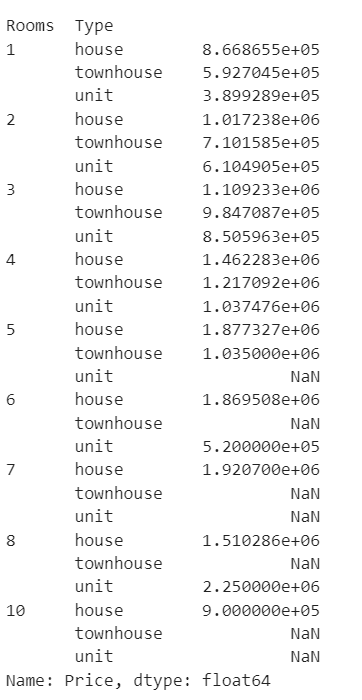

В результате выполнения такого кода мы получаем Series, которая обладает несколькими уровнями индексов: первый уровень — число комнат, второй уровень — тип здания. Такая организация индексов называется иерархической. Вычисление параметра (средней цены) происходит во всех возможных комбинациях признаков.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html
Для того, чтобы финальный результат был представлен в виде сводной таблицы (первый группировочный признак по строкам, а второй — по столбцам), а не в виде Series с иерархическими индексами, к результату чаще всего применяют метод unstack(), который позволяет переопределить вложенный индекс в виде столбцов таблицы:

In [ ]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean().unstack()

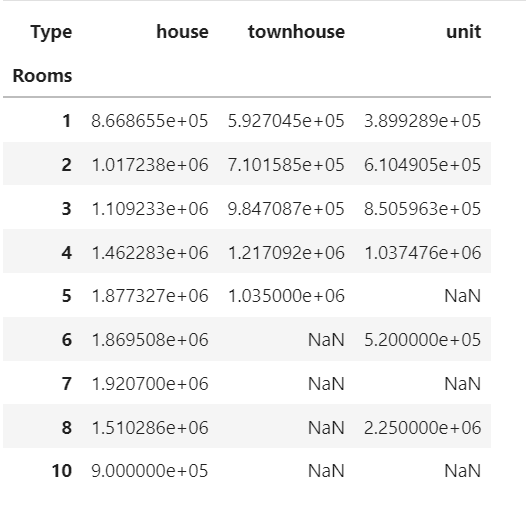

МЕТОД PIVOT_TABLE ДЛЯ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ

На самом деле метод groupby редко используется при двух параметрах, так как для построения сводных таблиц существует специальный и более простой метод — pivot_table().

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html

Основные параметры метода pivot_table()

values — имя столбца, по которому необходимо получить сводные данные, применяя агрегирующую функцию;
index — имя столбца, значения которого станут строками сводной таблицы;
columns — имя столбца, значения которого станут столбцами сводной таблицы;
aggfunc — имя или список имён агрегирующих функций (по умолчанию — подсчёт среднего, 'mean');
fill_value — значение, которым необходимо заполнить пропуски (по умолчанию пропуски не заполняются).

Давайте построим ту же самую таблицу, но уже с использованием метода pivot_table. В качестве параметра values укажем столбец Price, в качестве индексов сводной таблицы возьмём Rooms, а в качестве столбцов — Type. Агрегирующую функцию оставим по умолчанию (среднее). Дополнительно заменим пропуски в таблице на значение 0. Финальный результат для наглядности вывода округлим с помощью метода round() до целых.

In [ ]:
melb_df.pivot_table(
    values='Price',
    index='Rooms',
    columns='Type',
    fill_value=0
).round()

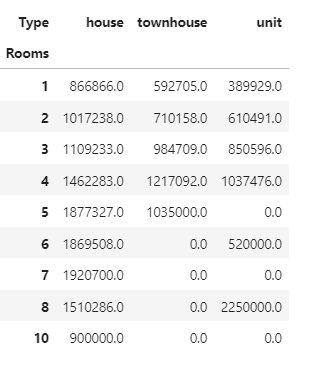

А теперь давайте проанализируем продажи в каждом из регионов в зависимости от того, будний был день или выходной. Для этого построим сводную таблицу, в которой строками будут являться названия регионов (Regionname), а в столбцах будет располагаться наш «признак-мигалка» выходного дня (Weekend), который равен 1, если день был выходным, и 0 — в противном случае. В качестве значений сводной таблицы возьмём количество продаж.

In [ ]:
melb_df.pivot_table(
    values='Price',
    index='Regionname',
    columns='Weekend',
    aggfunc='count'
)

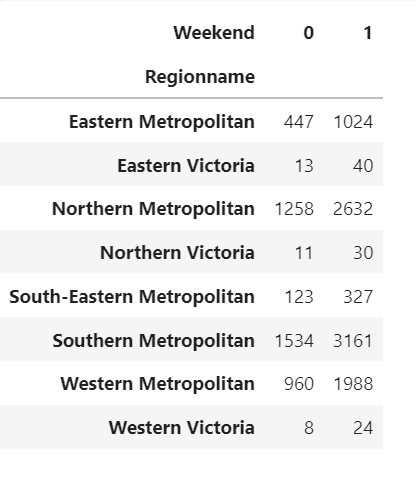

Разберём ещё один пример: найдём, как зависит средняя и медианная площадь участка (Landsize) от типа объекта (Type) и его региона (Regionname). Чтобы посмотреть несколько статистических параметров, нужно передать в аргумент aggfunc список из агрегирующих функций. Построим такую сводную таблицу, где пропущенные значения заменим на 0:

In [ ]:
melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

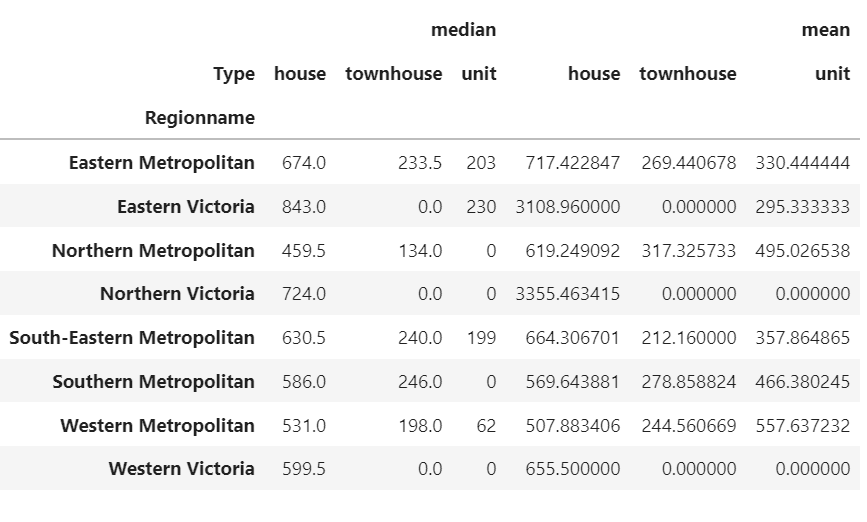

Давайте построим таблицу, в которой по индексам будут располагаться признаки метода продажи (Method) и типа объекта (Type), по столбцам — наименование региона (Regionname), а на пересечении строк и столбцов будет стоять медианная цена объекта (Price):

In [ ]:
melb_df.pivot_table(
    values='Price',
    index=['Method','Type'],
    columns='Regionname',
    aggfunc='median',
    fill_value=0
)

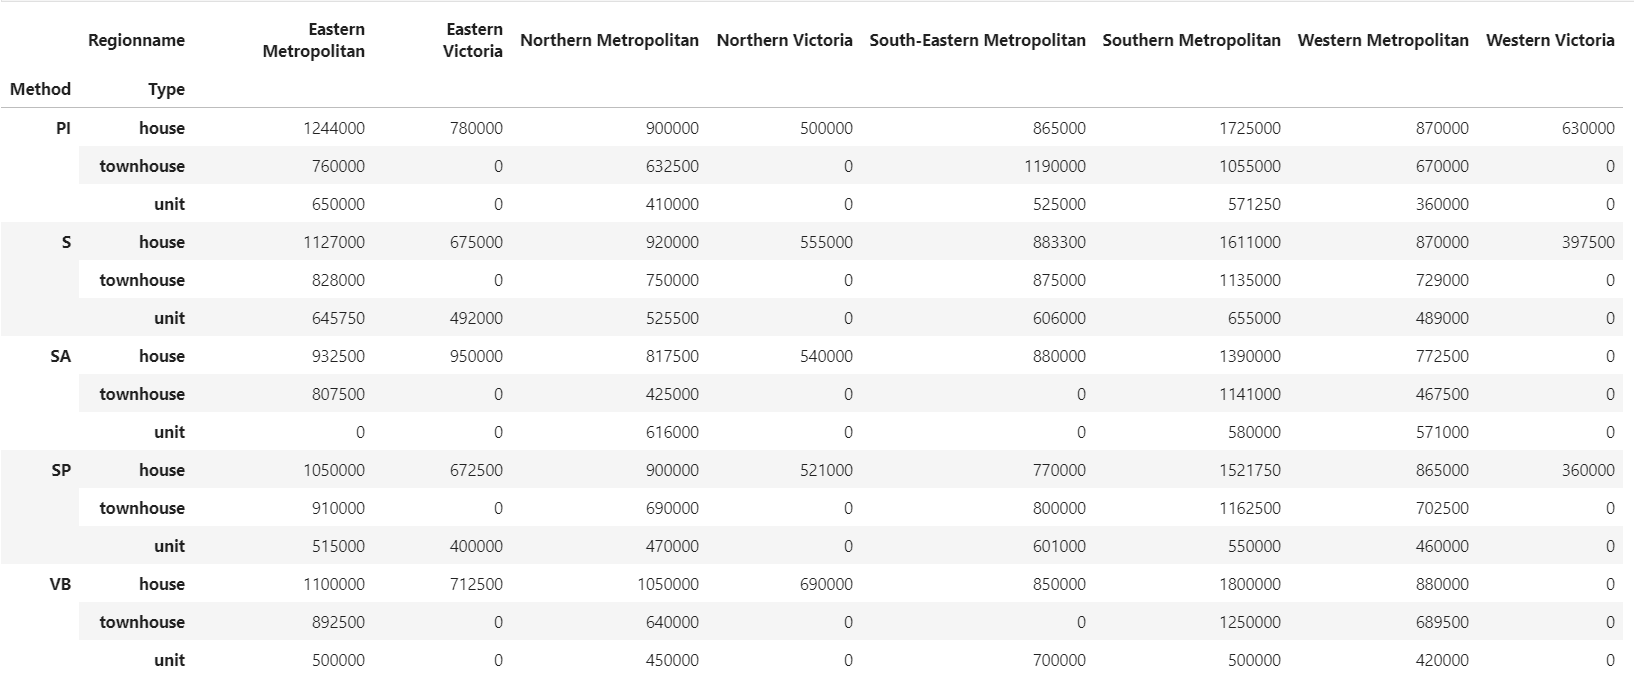

In [ ]:
pivot = melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)
pivot.columns

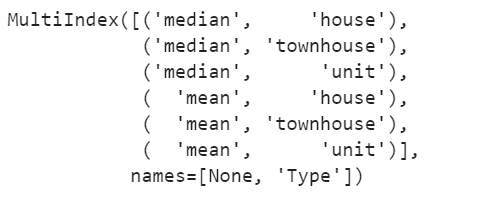

В результате мы получаем объект MultiIndex. Этот объект хранит в себе шесть комбинаций пар столбцов (два статистических параметра и три типа здания), то есть есть шесть возможных вариантов обращения к столбцам таблицы.

Мультииндексы раскрываются подобно вложенным словарям — по очереди, как матрёшка. Чтобы получить доступ к определённому столбцу, вы должны сначала обратиться к столбцу, который находится уровнем выше.

In [ ]:
display(pivot['mean']['unit'])

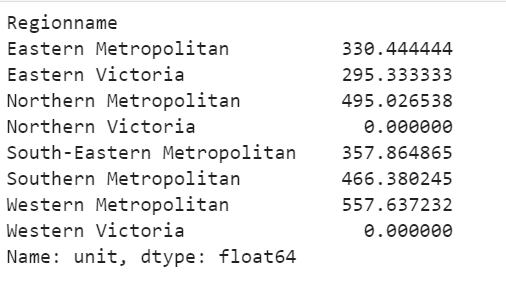

Аналогично производится и фильтрация данных. Например, если нам нужны регионы, в которых средняя площадь здания для домов типа house меньше их медианной площади, то мы можем найти их следующим образом:

In [ ]:
mask = pivot['mean']['house'] < pivot['median']['house']
filtered_pivot = pivot[mask]
display(filtered_pivot)

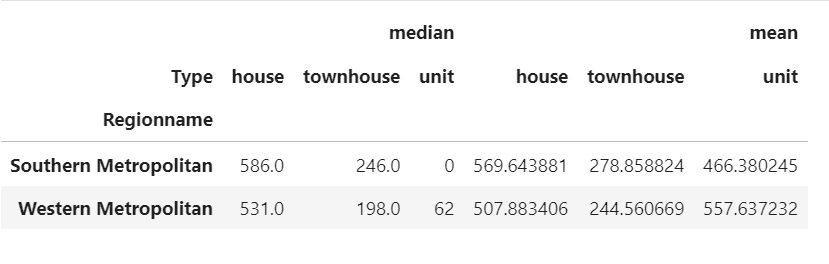

In [ ]:
print(list(filtered_pivot.index))
# ['Southern Metropolitan', 'Western Metropolitan']

In [ ]:
import numpy as np
mser = pd.Series(
    np.random.rand(8),
	index=[['white','white','white','blue','blue','red','red','red'], 
           ['up','down','right','up','down','up','down','left']])
display(mser)

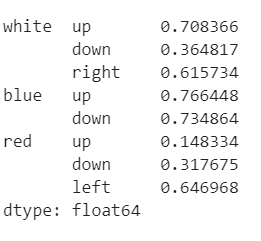

In [ ]:
mframe = pd.DataFrame(
    np.random.randn(16).reshape(4,4),
    index=[['white','white','red','red'], ['up','down','up','down']],
    columns=[['pen','pen','paper','paper'],[1,2,1,2]]
)
display(mframe)

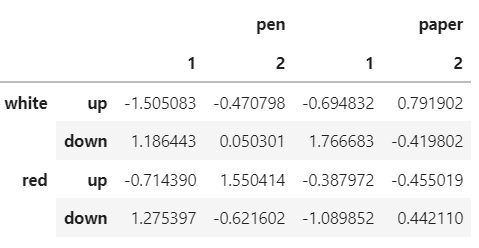

Для этого воспользуемся встроенной функцией Pandas concat(), которая позволяет склеивать (конкатенировать) таблицы как по строкам, так и по столбцам.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

Основные параметры функции concat()

objs — список объектов DataFrame ([df1, df2,…]), которые должны быть сконкатенированы;

axis — ось определяет направление конкатенации: 0 — конкатенация по строкам (по умолчанию), 1 — конкатенация по столбцам;

join — либо inner (пересечение), либо outer (объединение); рассмотрим этот момент немного позже;

ignore_index — по умолчанию установлено значение False, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных. Если установлено значение True, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.

Для корректной конкатенации по строкам объединяемые таблицы должны иметь одинаковую структуру — идентичное число и имена столбцов.

In [ ]:
ratings = pd.concat(
    [ratings1, ratings2],
    ignore_index=True
)

Чтобы очистить таблицу от дублей, мы можем воспользоваться методом DataFrame drop_duplicates(), который удаляет повторяющиеся строки в таблице. Не забываем обновить индексы после удаления дублей, выставив параметр ignore_index в методе drop_duplicates() на значение True

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

In [ ]:
ratings = ratings.drop_duplicates(ignore_index=True)

6.3
В ваше распоряжение предоставлена директория users. В данной директории содержатся csv-файлы, в каждом из которых хранится информация об идентификаторах пользователей (user_id) и ссылки на их фотографии (photo_url). Файлов в директории может быть сколько угодно.

Вам необходимо написать функцию concat_user_files(path), параметром которой является path — путь до директории. Функция должна объединить информацию из предоставленных вам файлов в один DataFrame и вернуть его.

Список названий всех файлов, находящихся в директории, вы можете получить с помощью функции os.listdir(path) из модуля os. Отсортируйте полученный список, прежде чем производить объединение файлов.

Обратите внимание, что метод os.listdir() возвращает только названия файлов в указанной директории, а при чтении файла необходимо указывать полный путь до него.

Не забудьте обновить индексы результирующей таблицы после объединения.

Примечание. Учтите, что на тестовом наборе файлов в результате объединения могут возникнуть дубликаты, от которых необходимо будет избавиться.

Например, для директории users/ результирующая таблица должна иметь следующий вид:

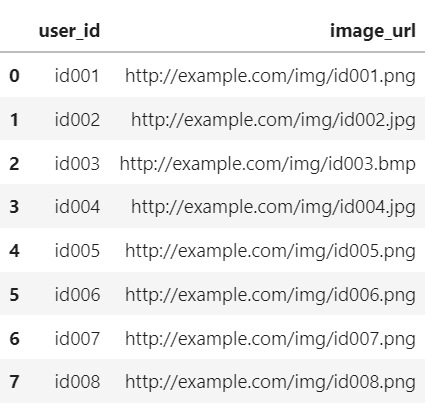

In [ ]:
import pandas as pd
import os

def concat_user_files(path):
    data = pd.DataFrame()
    file_names = os.listdir(path)
    file_names.sort()
    for file in file_names:
        tmp_data = pd.read_csv(path + '/' + file)
        data = pd.concat([data, tmp_data], axis=0, ignore_index=True)
    data = data.drop_duplicates()
    return data

МЕТОД ОБЪЕДИНЕНИЯ JOIN

Для объединения двух таблиц по индексам используется метод DataFrame join(). Однако данный метод можно применить и для того, чтобы объединить таблицы по ключевому столбцу (в нашем случае это movieId).

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

Основные параметры метода join()

other — таблица, которую мы присоединяем. При объединении она является «правой», а исходная таблица, от имени которой вызывается метод, является «левой».

how — параметр типа объединения. Он может принимать значения 'inner', 'left' (left outer), 'right' (right outer), и 'outer' (full outer). По умолчанию параметр установлен на 'left'.

on — параметр, который определяет, по какому столбцу в «левой» таблице происходит объединение по индексам из «правой».

lsuffix и rsuffix — дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.

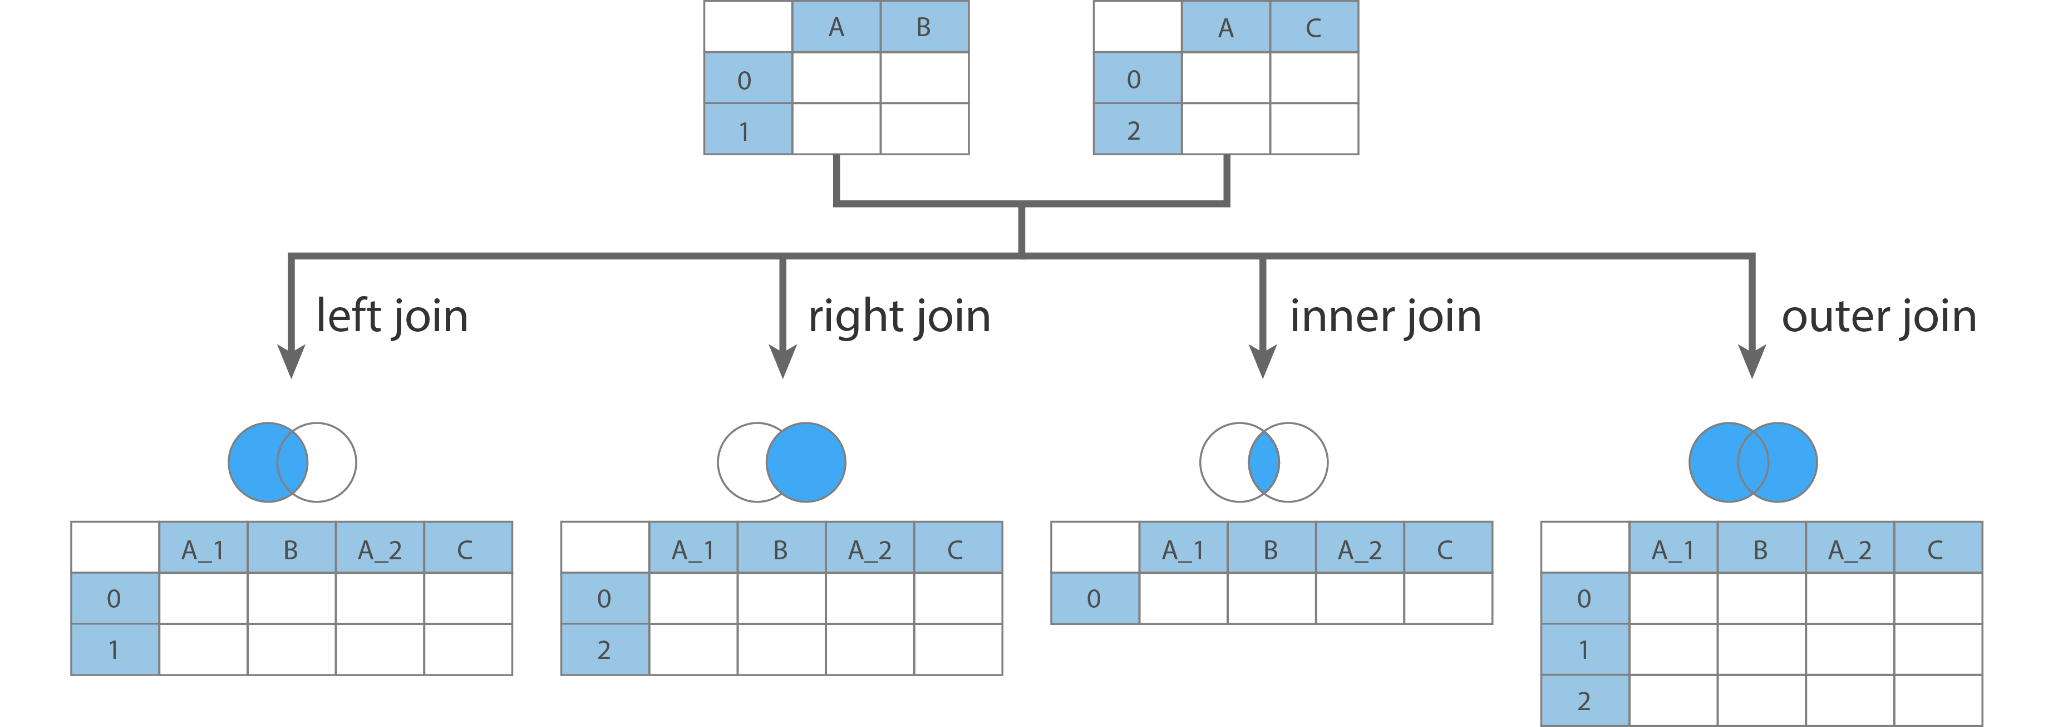

Чтобы совместить таблицы по ключевому столбцу с помощью метода join(), необходимо использовать ключевой столбец в «правой» таблице в качестве индекса. Это можно сделать с помощью метода set_index(). Также необходимо указать название ключа в параметре on.

In [ ]:
joined = ratings_dates.join(
    movies.set_index('movieId'),
    on='movieId',
    how='left'
)

МЕТОД ОБЪЕДИНЕНИЯ MERGE

Аналогично предыдущему, метод merge() предназначен для слияния двух таблиц по ключевым столбцам или по индексам. Однако, в отличие от join(), метод merge() предлагает более гибкий способ управления объединением, благодаря чему является более популярным.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

Основные параметры метода merge()

right — присоединяемая таблица. По умолчанию она является «правой».

how — параметр типа объединения. По умолчанию принимает значение 'inner'.

on — параметр, который определяет, по какому столбцу происходит объединение. Определяется автоматически, но рекомендуется указывать вручную.

left_on — если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр отвечает за наименования ключевого столбца исходной таблицы.

right_on — аналогично предыдущему, параметр отвечает за наименование ключевого столбца присоединяемой таблицы.

Метод merge() в первую очередь предназначен для слияния таблиц по заданным ключам, поэтому он не требует установки ключевых столбцов в качестве индекса присоединяемой таблицы. Кроме того, данный метод позволяет объединять даже таблицы с разноимёнными ключами. Таким образом, merge() проще в использовании и более многофункционален, чем схожие методы.

In [ ]:
merged = ratings_dates.merge(
    movies,
    on='movieId',
    how='left'
)

Метод merge() с внешним (outer) типом объединения может использоваться как аналог метода concat() при объединении таблиц с одинаковой структурой (одинаковые количество и названия столбцов) по строкам. В таком случае все одноимённые столбцы таблиц будут считаться ключевыми.

In [ ]:
merge_ratings = ratings1.merge(ratings2, how='outer')
print('Число строк в таблице merge_ratings: ', merge_ratings.shape[0])
display(merge_ratings)

Обратите внимание, что при использовании метода merge() для склейки двух таблиц у нас автоматически пропали дубликаты, которые мы видели при использовании метода concat(). Это особенность метода merge() — автоматическое удаление дублей.

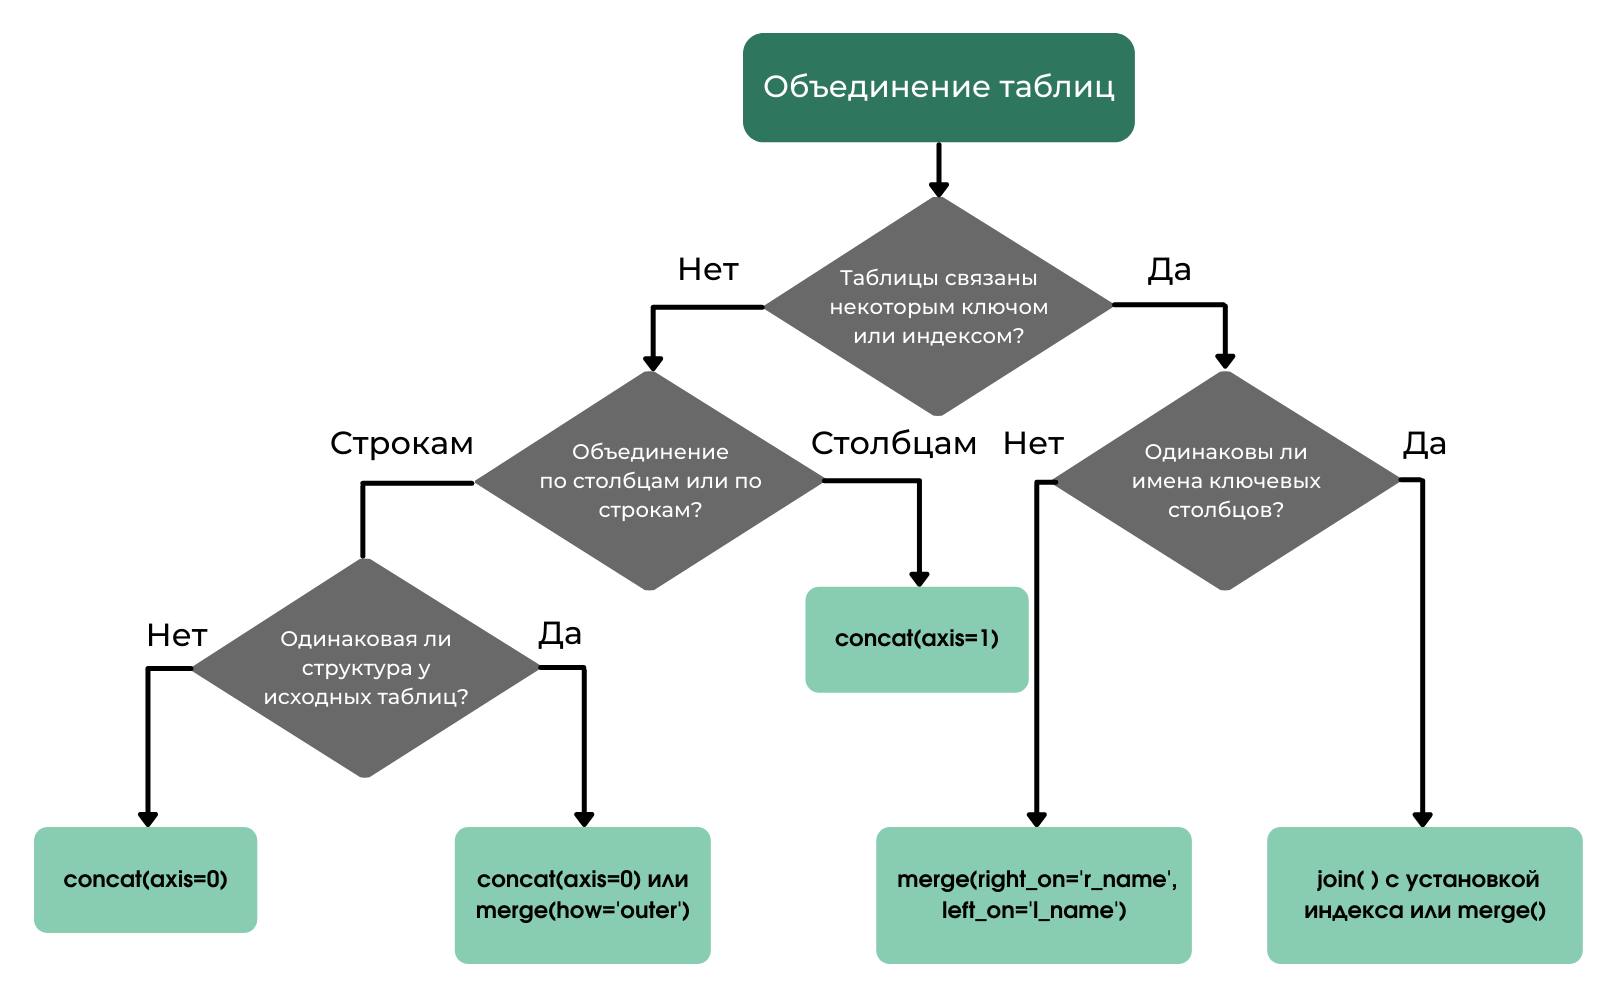

7.5

Даны две таблицы: items_df, в которой содержится информация о наличии товаров на складе, и purchase_df — с данными о покупках товаров.

items_df = pd.DataFrame({
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394], 
    'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
    'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
})
purchase_df = pd.DataFrame({
    'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132], 
    'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
})
Информация в таблицах представлена в виде следующих столбцов:

item_id — идентификатор модели;
vendor — производитель модели;
stock_count — имеющееся на складе количество данных моделей (в штуках);
purchase_id — идентификатор покупки;
price — стоимость модели в покупке.
Сформируйте DataFrame merged, в котором в результате объединения purchase_df и items_df останутся модели, которые учтены на складе и имели продажи.
Из таблицы merged найдите суммарную выручку, которую можно было бы получить от продажи всех товаров, которые учтены на складе и имели продажи. Результат занесите в переменную income.

In [ ]:
import pandas as pd

items_df = pd.DataFrame({
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394], 
    'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
    'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
})
purchase_df = pd.DataFrame({
    'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132], 
    'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
})

merged = purchase_df.merge(items_df, how = 'inner', on = 'item_id')
print(merged)
income = (merged['price'] * merged['stock_count']).sum()
print(income)

   purchase_id  item_id  price   vendor  stock_count
0          101   417283  13900  Samsung           54
1          101   849734   5330       LG           33
2          101   132223  38200    Apple          122
3          112   573943  49990    Apple           18
4          121    19475   9890       LG          102
5          145  3294095  33000    Apple           43
6          145   382043  67500  Samsung           77
7          145   302948  34500  Samsung          143
8          221   100132  11400       LG           60
19729490


https://tproger.ru/translations/regular-expression-python/

Модуль re предназначен для поиска шаблонов в тексте и встроен в язык, поэтому не нуждается в установке.

Из модуля re нам понадобится только функция findall(), которая позволяет найти в строке все слова, удовлетворяющие шаблону. Мы находим в строке с названием фильма шаблон "(DDDD)" — четыре цифры, обёрнутых в скобки, что соответствует году выпуска фильма. Если такого шаблона не было найдено (год выпуска не указан), функция возвращает None (в таблице это будет помечено как пропуск).